# HDA Demo

In [1]:
from final_pipeline import *

In [2]:
unprocessed_model = load_model('./models/unprocessed_50_epochs')
processed_model = load_model('./models/base_fixed_50_epochs')
features_model = load_model('./models/full_fixed_50_epochs')
resnet = load_model('./models/resnet')

Loading model ./models/unprocessed_50_epochs
Loading model ./models/base_fixed_50_epochs
Loading model ./models/full_fixed_50_epochs
Loading model ./models/resnet


In [4]:
test_df = pd.read_excel('./data/test/test.xlsx')
test_df

,Case ID,Sex,Ground truth bone age (months)
0,4360,M,168.934249
1,4361,M,169.652678
2,4362,M,73.256112
3,4363,M,152.862669
4,4364,M,135.456954
...,...,...,...
195,4555,F,133.486757
196,4556,F,129.254493
197,4557,F,167.685033
198,4558,F,135.980312


In [5]:
decent_id = 4506
preprocessing_issues_id = 4551
perfect_id = 4507

In [13]:
case_id = decent_id

In [14]:
image_path = f'./data/test/images/{case_id}.png'
gender = 1 if test_df[test_df['Case ID'] == case_id]['Sex'].item() == 'M' else 0
age = test_df[test_df['Case ID'] == case_id]['Ground truth bone age (months)'].item()

In [15]:
image = cv2.imread(image_path, 0)

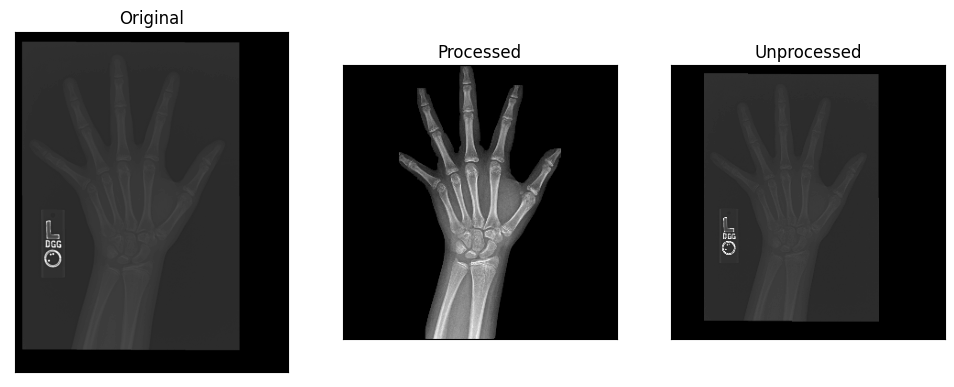

In [17]:
processed_image = process_image(image)
unprocessed_image = reshape(image, 299)
plt.figure(figsize=(12, 6))
plot_side_by_side([image, processed_image, unprocessed_image], ['Original', 'Processed', 'Unprocessed'], labels=False)

In [18]:
unprocessed_input = create_single_input(unprocessed_image, gender)
processed_input = create_single_input(processed_image, gender)
image_features = resnet.predict(prepare_resnet(unprocessed_image))[0]
features_input = create_single_input(processed_image, [gender, *process_features(image_features)])

1/1 [==============================] - 0s 32ms/step


In [19]:
unprocessed_result = unprocessed_model.predict(unprocessed_input)[0][0] * 200
halfprocessed_result = processed_model.predict(unprocessed_input)[0][0] * 200
processed_result = processed_model.predict(processed_input)[0][0] * 200
features_result = features_model.predict(features_input)[0][0] * 200

1/1 [==============================] - 0s 36ms/step


In [20]:
print(f'Real Age:    {age:6.2f} months\n'
      f'Unprocessed: {unprocessed_result:6.2f} months ({unprocessed_result - age:.2f})\n'
      f'Processed:   {processed_result:6.2f} months ({processed_result - age:.2f})\n'
      f'    Mixed:   {halfprocessed_result:6.2f} months ({halfprocessed_result - age:.2f})\n'
      f'Features:    {features_result:6.2f} months ({features_result - age:.2f})\n'
      )

Real Age:    155.97 months
Unprocessed: 124.87 months (-31.11)
Processed:   157.85 months (1.88)
    Mixed:   160.11 months (4.14)
Features:     93.41 months (-62.56)

